## Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import  LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency
from scipy import stats
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,confusion_matrix,roc_auc_score,roc_curve,auc
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
import warnings
warnings.filterwarnings("ignore")

/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Acquire Data

In [2]:
# Read the churn dataset into a dataframe as variable df.
df = pd.read_csv('churn_clean.csv')
df = pd.DataFrame(df)
# Quick look at the data.
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


## Gather insight

In [3]:
# Print information about the dataset.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
# Print statistical description of columns in the dataset. 
print(df.describe(include='all'))

          CaseOrder Customer_id                           Interaction  \
count   10000.00000       10000                                 10000   
unique          NaN       10000                                 10000   
top             NaN     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
freq            NaN           1                                     1   
mean     5000.50000         NaN                                   NaN   
std      2886.89568         NaN                                   NaN   
min         1.00000         NaN                                   NaN   
25%      2500.75000         NaN                                   NaN   
50%      5000.50000         NaN                                   NaN   
75%      7500.25000         NaN                                   NaN   
max     10000.00000         NaN                                   NaN   

                                     UID     City  State      County  \
count                              10000    10000  

In [5]:
# Print the data type of each column.
print(df.dtypes)

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

In [6]:
# Print the sum of mising values in each column.
print(df.isnull().sum())

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [7]:
# Print the percentage of missing values for each column.
print(df.isnull().sum() / len(df) * 100)

CaseOrder               0.0
Customer_id             0.0
Interaction             0.0
UID                     0.0
City                    0.0
State                   0.0
County                  0.0
Zip                     0.0
Lat                     0.0
Lng                     0.0
Population              0.0
Area                    0.0
TimeZone                0.0
Job                     0.0
Children                0.0
Age                     0.0
Income                  0.0
Marital                 0.0
Gender                  0.0
Churn                   0.0
Outage_sec_perweek      0.0
Email                   0.0
Contacts                0.0
Yearly_equip_failure    0.0
Techie                  0.0
Contract                0.0
Port_modem              0.0
Tablet                  0.0
InternetService         0.0
Phone                   0.0
Multiple                0.0
OnlineSecurity          0.0
OnlineBackup            0.0
DeviceProtection        0.0
TechSupport             0.0
StreamingTV         

In [8]:
# Print the sum of duplicates in each column. 
print(df.duplicated().sum())

0


In [9]:
# Print unique values for categorical columns.
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Customer_id: ['K409198' 'S120509' 'K191035' ... 'I243405' 'I641617' 'T38070']
Unique values in Interaction: ['aa90260b-4141-4a24-8e36-b04ce1f4f77b'
 'fb76459f-c047-4a9d-8af9-e0f7d4ac2524'
 '344d114c-3736-4be5-98f7-c72c281e2d35' ...
 'e8307ddf-9a01-4fff-bc59-4742e03fd24f'
 '3775ccfc-0052-4107-81ae-9657f81ecdf3'
 '9de5fb6e-bd33-4995-aec8-f01d0172a499']
Unique values in UID: ['e885b299883d4f9fb18e39c75155d990' 'f2de8bef964785f41a2959829830fb8a'
 'f1784cfa9f6d92ae816197eb175d3c71' ... '9c41f212d1e04dca84445019bbc9b41c'
 '3e1f269b40c235a1038863ecf6b7a0df' '0ea683a03a3cd544aefe8388aab16176']
Unique values in City: ['Point Baker' 'West Branch' 'Yamhill' ... 'Haubstadt' 'West Kill'
 'Clarkesville']
Unique values in State: ['AK' 'MI' 'OR' 'CA' 'TX' 'GA' 'TN' 'OK' 'FL' 'OH' 'PA' 'PR' 'IA' 'ME'
 'IL' 'WI' 'NC' 'AL' 'NM' 'VT' 'MD' 'NY' 'WA' 'CT' 'NJ' 'DC' 'ND' 'LA'
 'NE' 'WV' 'AZ' 'MO' 'WY' 'MT' 'VA' 'KY' 'MN' 'KS' 'MA' 'IN' 'SC' 'NH'
 'DE' 'MS' 'ID' 'AR' 'SD' 'CO' 'HI' 'UT' 'RI' 

## Data Cleaning

In [10]:
# Create variable to hold dtype changes
data_type_corrections = {  
    'Item1': 'str',
    'Item2': 'str',
    'Item3': 'str',
    'Item4': 'str',
    'Item5': 'str',
    'Item6': 'str',
    'Item7': 'str',
    'Item8': 'str',
    'CaseOrder':'str',
    'Zip':'str',
    
   
}

# Change data types
for column, dtype in data_type_corrections.items():
    df[column] = df[column].astype(dtype)
    


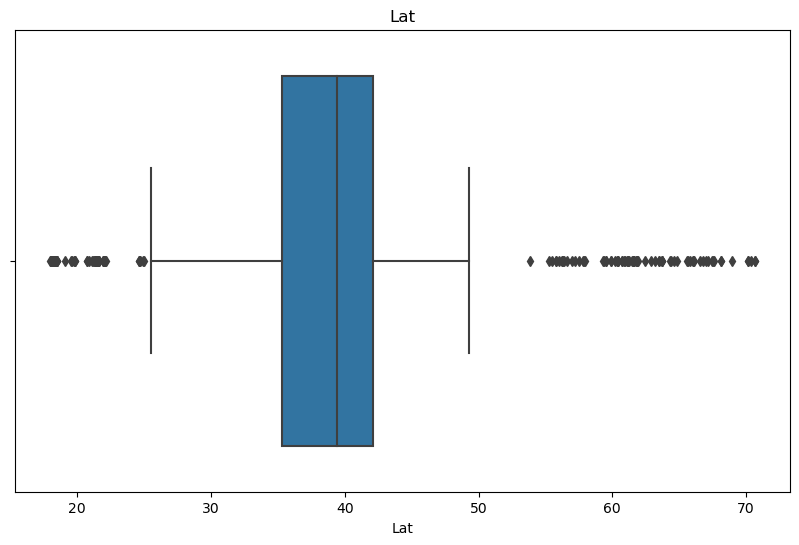

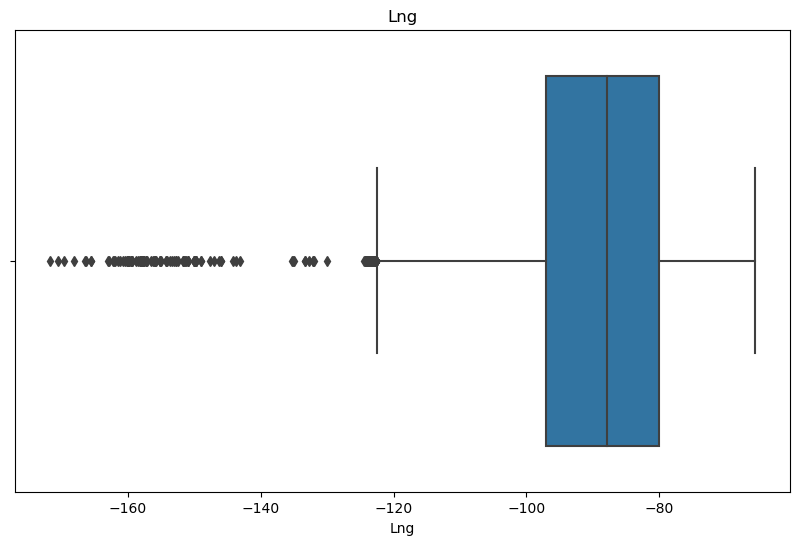

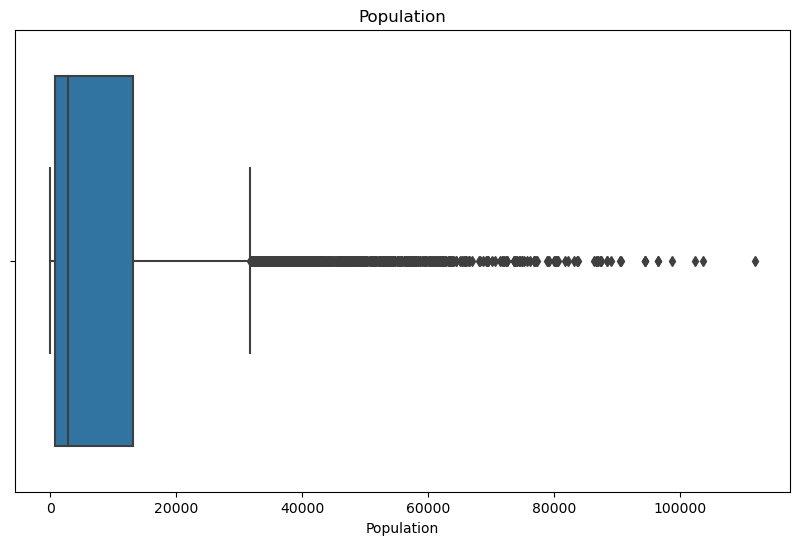

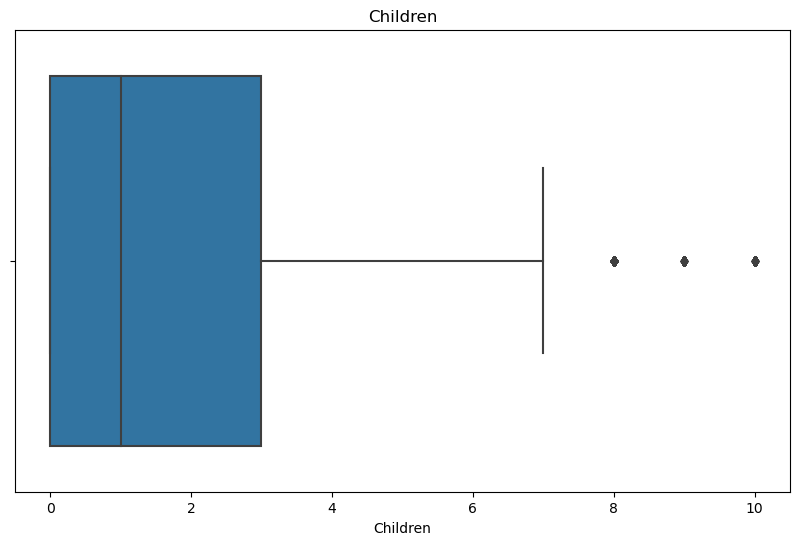

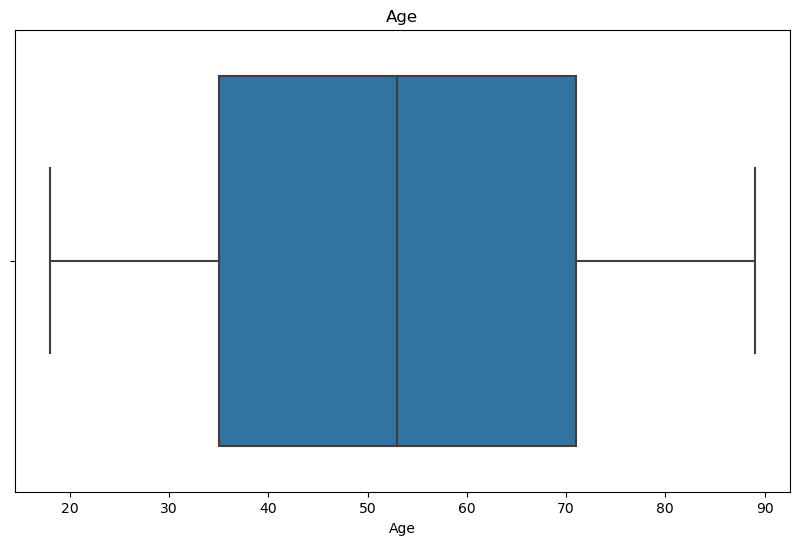

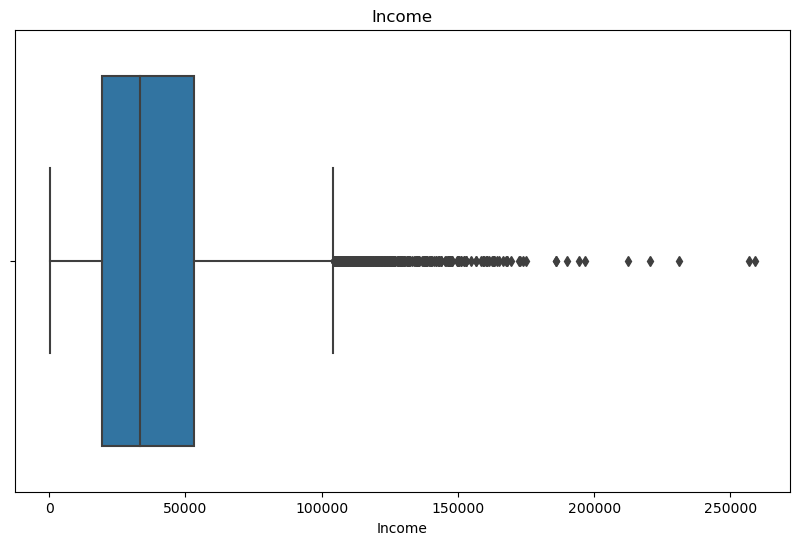

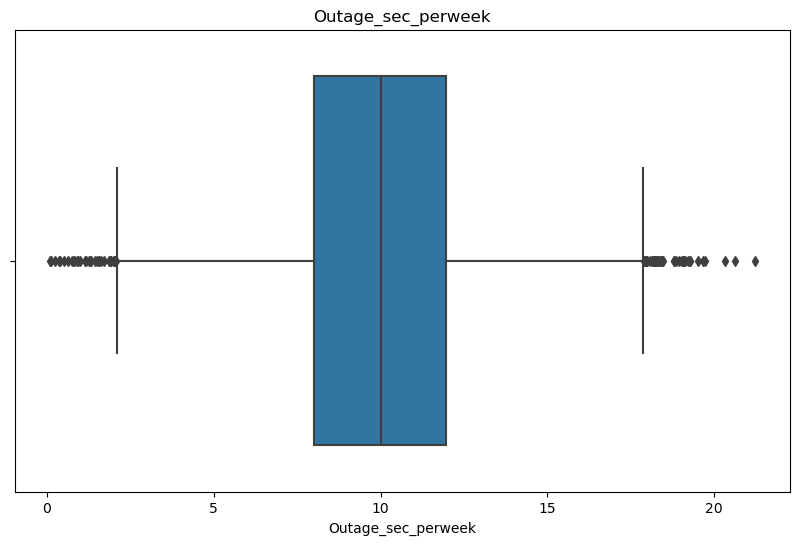

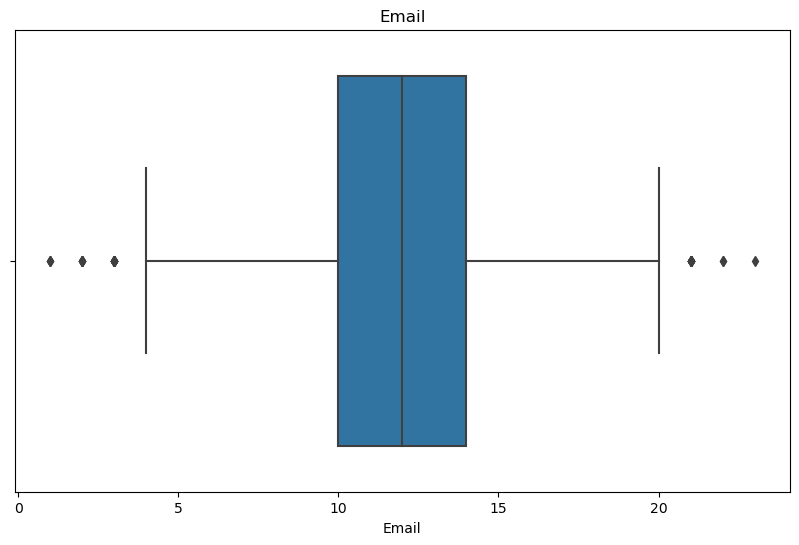

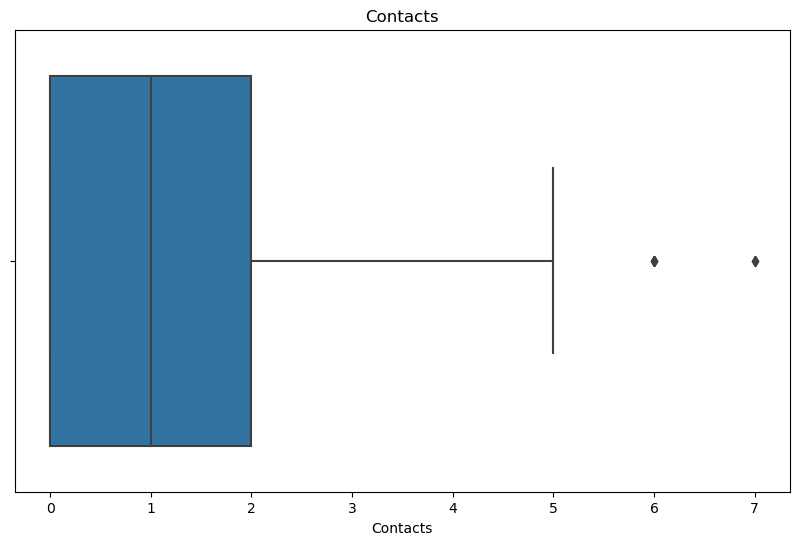

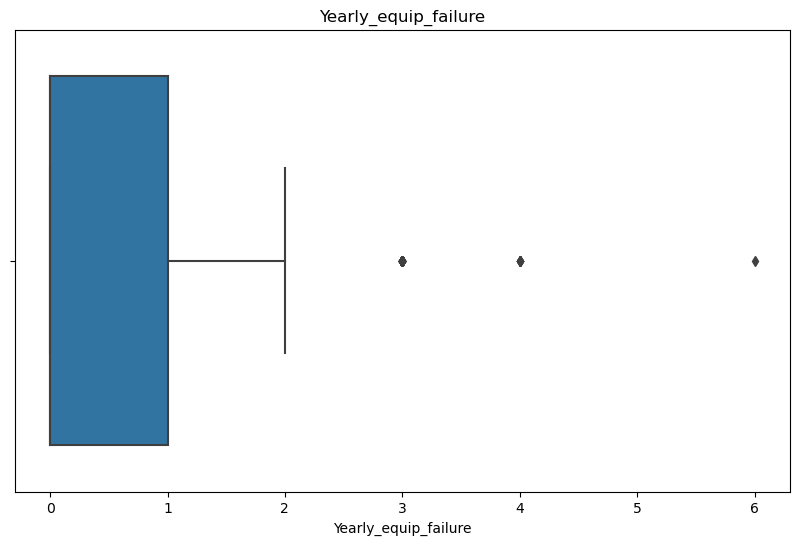

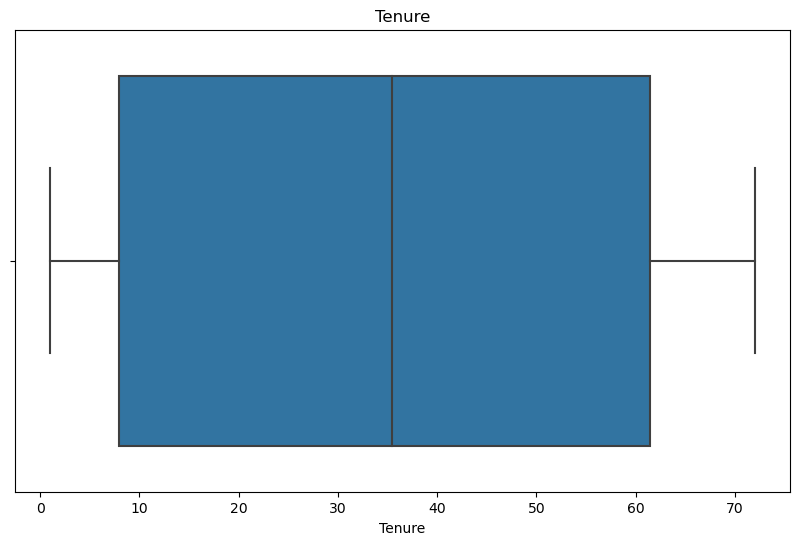

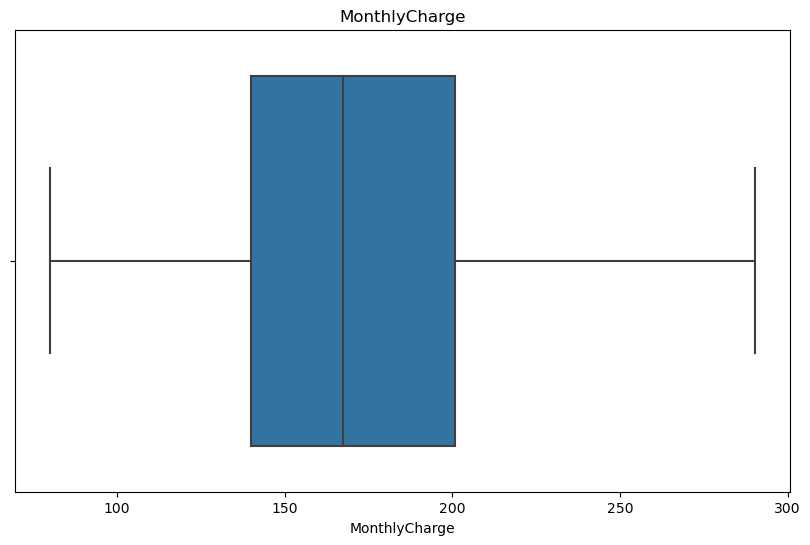

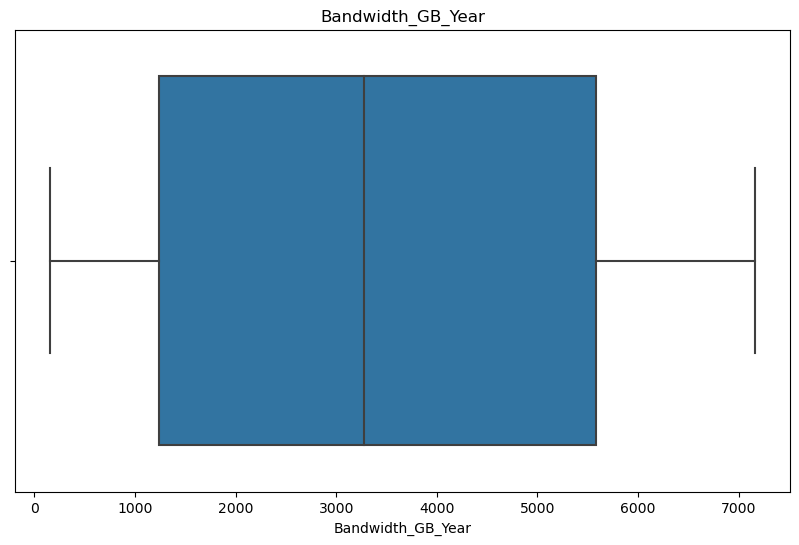

In [11]:
# Create boxplots to visualize outliers in columns.
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'{col}')
    plt.show()

In [12]:
# Renaming item columns.
rename_columns = {
    'Item1': 'TimelyResponse',
    'Item2': 'TimelyFixes',
    'Item3': 'TimelyReplacements',
    'Item4': 'Reliability',
    'Item5': 'Options',
    'Item6': 'RespectfulResponse',
    'Item7': 'CourteousExchange',
    'Item8': 'EvidenceOfActiveListening'
}

df.rename(columns=rename_columns, inplace=True)


# Function to replace outliers with the median.
def replace_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find the median value.
    median_value = df[column].median()
    
    # Replace outliers with median.
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])


# Apply the function to all numerical columns.
numerical_columns = df.select_dtypes(include=[np.number]).columns

for col in numerical_columns:
    replace_outliers(df, col)

In [13]:
# Round numerical values 
df = df.round(2)

# Final look before saving to csv.
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,TimelyFixes,TimelyReplacements,Reliability,Options,RespectfulResponse,CourteousExchange,EvidenceOfActiveListening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,39.40,-87.92,...,172.46,904.54,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.33,-84.24,...,242.63,800.98,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.36,-87.92,...,159.95,2054.71,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.97,-117.25,...,119.96,2164.58,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38,-95.81,...,149.95,271.49,4,4,4,3,4,4,4,5


In [14]:
# Print statistical description of columns in the dataset. 
df[['MonthlyCharge', 'Bandwidth_GB_Year', 'Age', 'Tenure' ]].describe()

,MonthlyCharge,Bandwidth_GB_Year,Age,Tenure
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,172.624724,3392.341505,53.078400,34.526188
std,42.943016,2185.294958,20.698882,26.443077
min,79.980000,155.510000,18.000000,1.000000
25%,139.980000,1236.470000,35.000000,7.920000
50%,167.480000,3279.535000,53.000000,35.430000
75%,200.737500,5586.145000,71.000000,61.480000
max,290.160000,7158.980000,89.000000,72.000000


In [15]:
df[['Churn','Contract','InternetService','TimelyResponse', 'TimelyFixes', 'TimelyReplacements', 'Reliability', 'Options', 'RespectfulResponse', 'CourteousExchange', 'EvidenceOfActiveListening','OnlineSecurity','PaymentMethod']].describe()

,Churn,Contract,InternetService,TimelyResponse,TimelyFixes,TimelyReplacements,Reliability,Options,RespectfulResponse,CourteousExchange,EvidenceOfActiveListening,OnlineSecurity,PaymentMethod
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,2,3,3,7,7,8,7,7,8,7,8,2,4
top,No,Month-to-month,Fiber Optic,3,3,3,4,3,3,4,3,No,Electronic Check
freq,7350,5456,4408,3448,3415,3435,3452,3462,3445,3456,3461,6424,3398


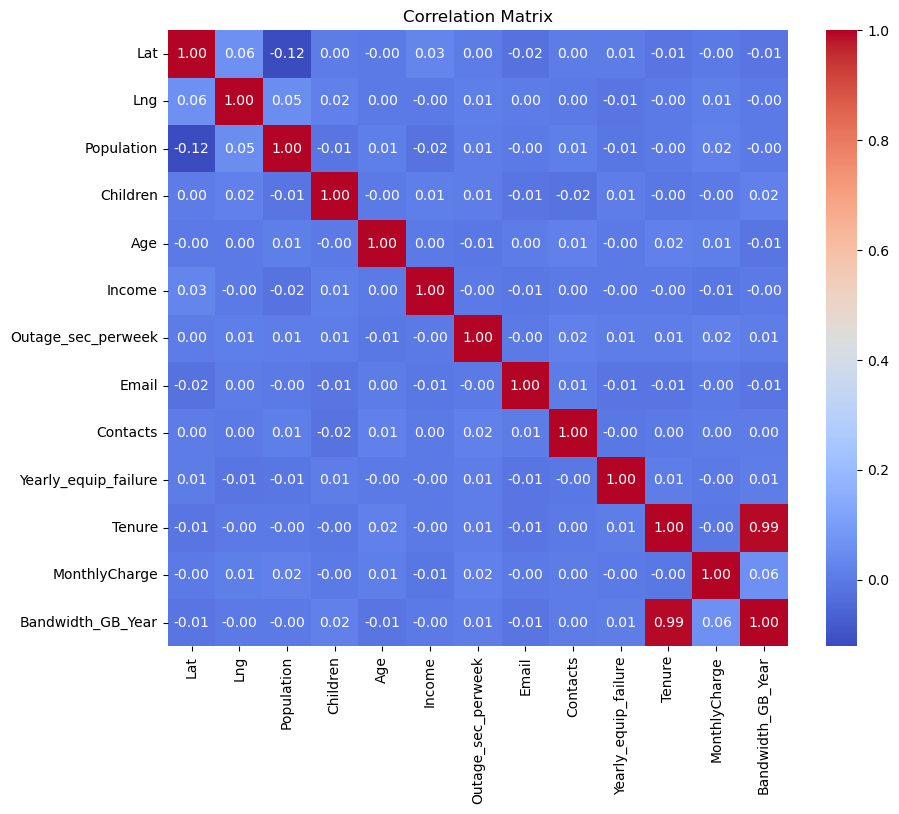

In [16]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [17]:
# Create a variable for the cleaned data and save file to csv. 
d209T2_cleaned_data = 'd209_data_mining_1_cleaned_data.csv'
df.to_csv(d209T2_cleaned_data, index=False)



## Statistical Testing

In [18]:
# Numerical features to test
numerical_features = ['MonthlyCharge', 'Bandwidth_GB_Year', 'Age', 'Tenure']

# Loop through each feature and perform the t-test
for feature in numerical_features:
    # Split the feature data based on churn values
    churned = df[df['Churn'] == 'Yes'][feature]
    not_churned = df[df['Churn'] == 'No'][feature]
    
    # Perform t-test
    t_stat, p_value = ttest_ind(churned, not_churned, nan_policy='omit')

    print(f"Feature: {feature}")
    print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}\n")



Feature: MonthlyCharge
T-Statistic: 40.1895, P-Value: 0.0000

Feature: Bandwidth_GB_Year
T-Statistic: -49.2237, P-Value: 0.0000

Feature: Age
T-Statistic: 0.5629, P-Value: 0.5735

Feature: Tenure
T-Statistic: -55.5249, P-Value: 0.0000



In [19]:
# Select features for statistical testing
categorical_features = [
    'Contract', 'InternetService', 'TimelyResponse', 'TimelyFixes', 
    'TimelyReplacements', 'Reliability', 'Options', 'RespectfulResponse', 
    'CourteousExchange', 'EvidenceOfActiveListening','OnlineSecurity','PaymentMethod'
]

# Loop through each categorical feature and perform the Chi-square test
for feature in categorical_features:
    # Create a contingency table
    contingency_table = pd.crosstab(df[feature], df['Churn'])
    
    # Perform the Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Feature: {feature}")
    print(f"Chi-Square Statistic: {chi2:.4f}, P-Value: {p:.4f}\n")


Feature: Contract
Chi-Square Statistic: 718.5916, P-Value: 0.0000

Feature: InternetService
Chi-Square Statistic: 87.4620, P-Value: 0.0000

Feature: TimelyResponse
Chi-Square Statistic: 4.3321, P-Value: 0.6318

Feature: TimelyFixes
Chi-Square Statistic: 5.2724, P-Value: 0.5094

Feature: TimelyReplacements
Chi-Square Statistic: 5.3706, P-Value: 0.6148

Feature: Reliability
Chi-Square Statistic: 2.9611, P-Value: 0.8137

Feature: Options
Chi-Square Statistic: 5.6249, P-Value: 0.4665

Feature: RespectfulResponse
Chi-Square Statistic: 4.1294, P-Value: 0.7648

Feature: CourteousExchange
Chi-Square Statistic: 5.6379, P-Value: 0.4650

Feature: EvidenceOfActiveListening
Chi-Square Statistic: 1.7140, P-Value: 0.9740

Feature: OnlineSecurity
Chi-Square Statistic: 1.7698, P-Value: 0.1834

Feature: PaymentMethod
Chi-Square Statistic: 9.4374, P-Value: 0.0240



In [20]:
# Define columns
categorical_columns = [
    'Contract', 'InternetService', 'TimelyResponse', 'TimelyFixes', 
    'TimelyReplacements', 'Reliability', 'Options', 'RespectfulResponse', 
    'CourteousExchange', 'EvidenceOfActiveListening', 'OnlineSecurity', 'PaymentMethod'
]
numerical_columns = ['MonthlyCharge', 'Bandwidth_GB_Year', 'Age', 'Tenure']

# Split data into features and target
X = df[categorical_columns + numerical_columns]  
y = df['Churn']  

# Ensure categorical columns are of object type
X[categorical_columns] = X[categorical_columns].astype(str)

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_categorical_encoded = encoder.fit_transform(X[categorical_columns])

# Combine numerical and categorical features
X_encoded = np.hstack([X[numerical_columns].values, X_categorical_encoded])

# Create column names for the encoded dataset
numerical_feature_names = numerical_columns
categorical_feature_names = encoder.get_feature_names_out(categorical_columns)
all_feature_names = list(numerical_feature_names) + list(categorical_feature_names)

# Create a DataFrame with encoded features and encoded target
X_encoded_df = pd.DataFrame(X_encoded, columns=all_feature_names)
X_encoded_df['Churn'] = y_encoded  

# Save the encoded dataset to a CSV file
X_encoded_df.to_csv('D209t2_cleaned_encoded_dataset.csv', index=False)

# Train-test split on the encoded data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Set up the Decision Tree classifier
clf = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,           # Control the depth of the tree
    min_samples_split=10,   # Minimum samples required to split a node
    min_samples_leaf=5      # Minimum samples required to be at a leaf node
)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8685
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      1456
           1       0.76      0.76      0.76       544

    accuracy                           0.87      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.87      0.87      0.87      2000



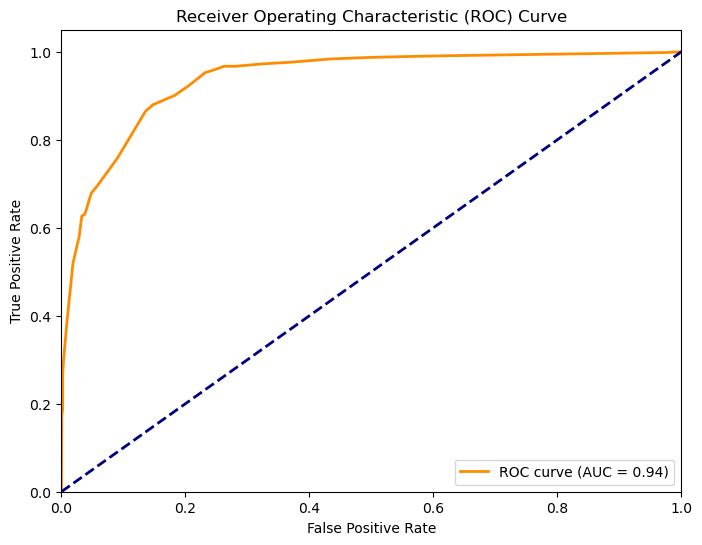

AUC: 0.94


In [21]:
# Get the predicted probabilities for the positive class (churn)
y_probs = clf.predict_proba(X_test)[:, 1]  # Select probabilities for the "churn" class

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc:.2f}")

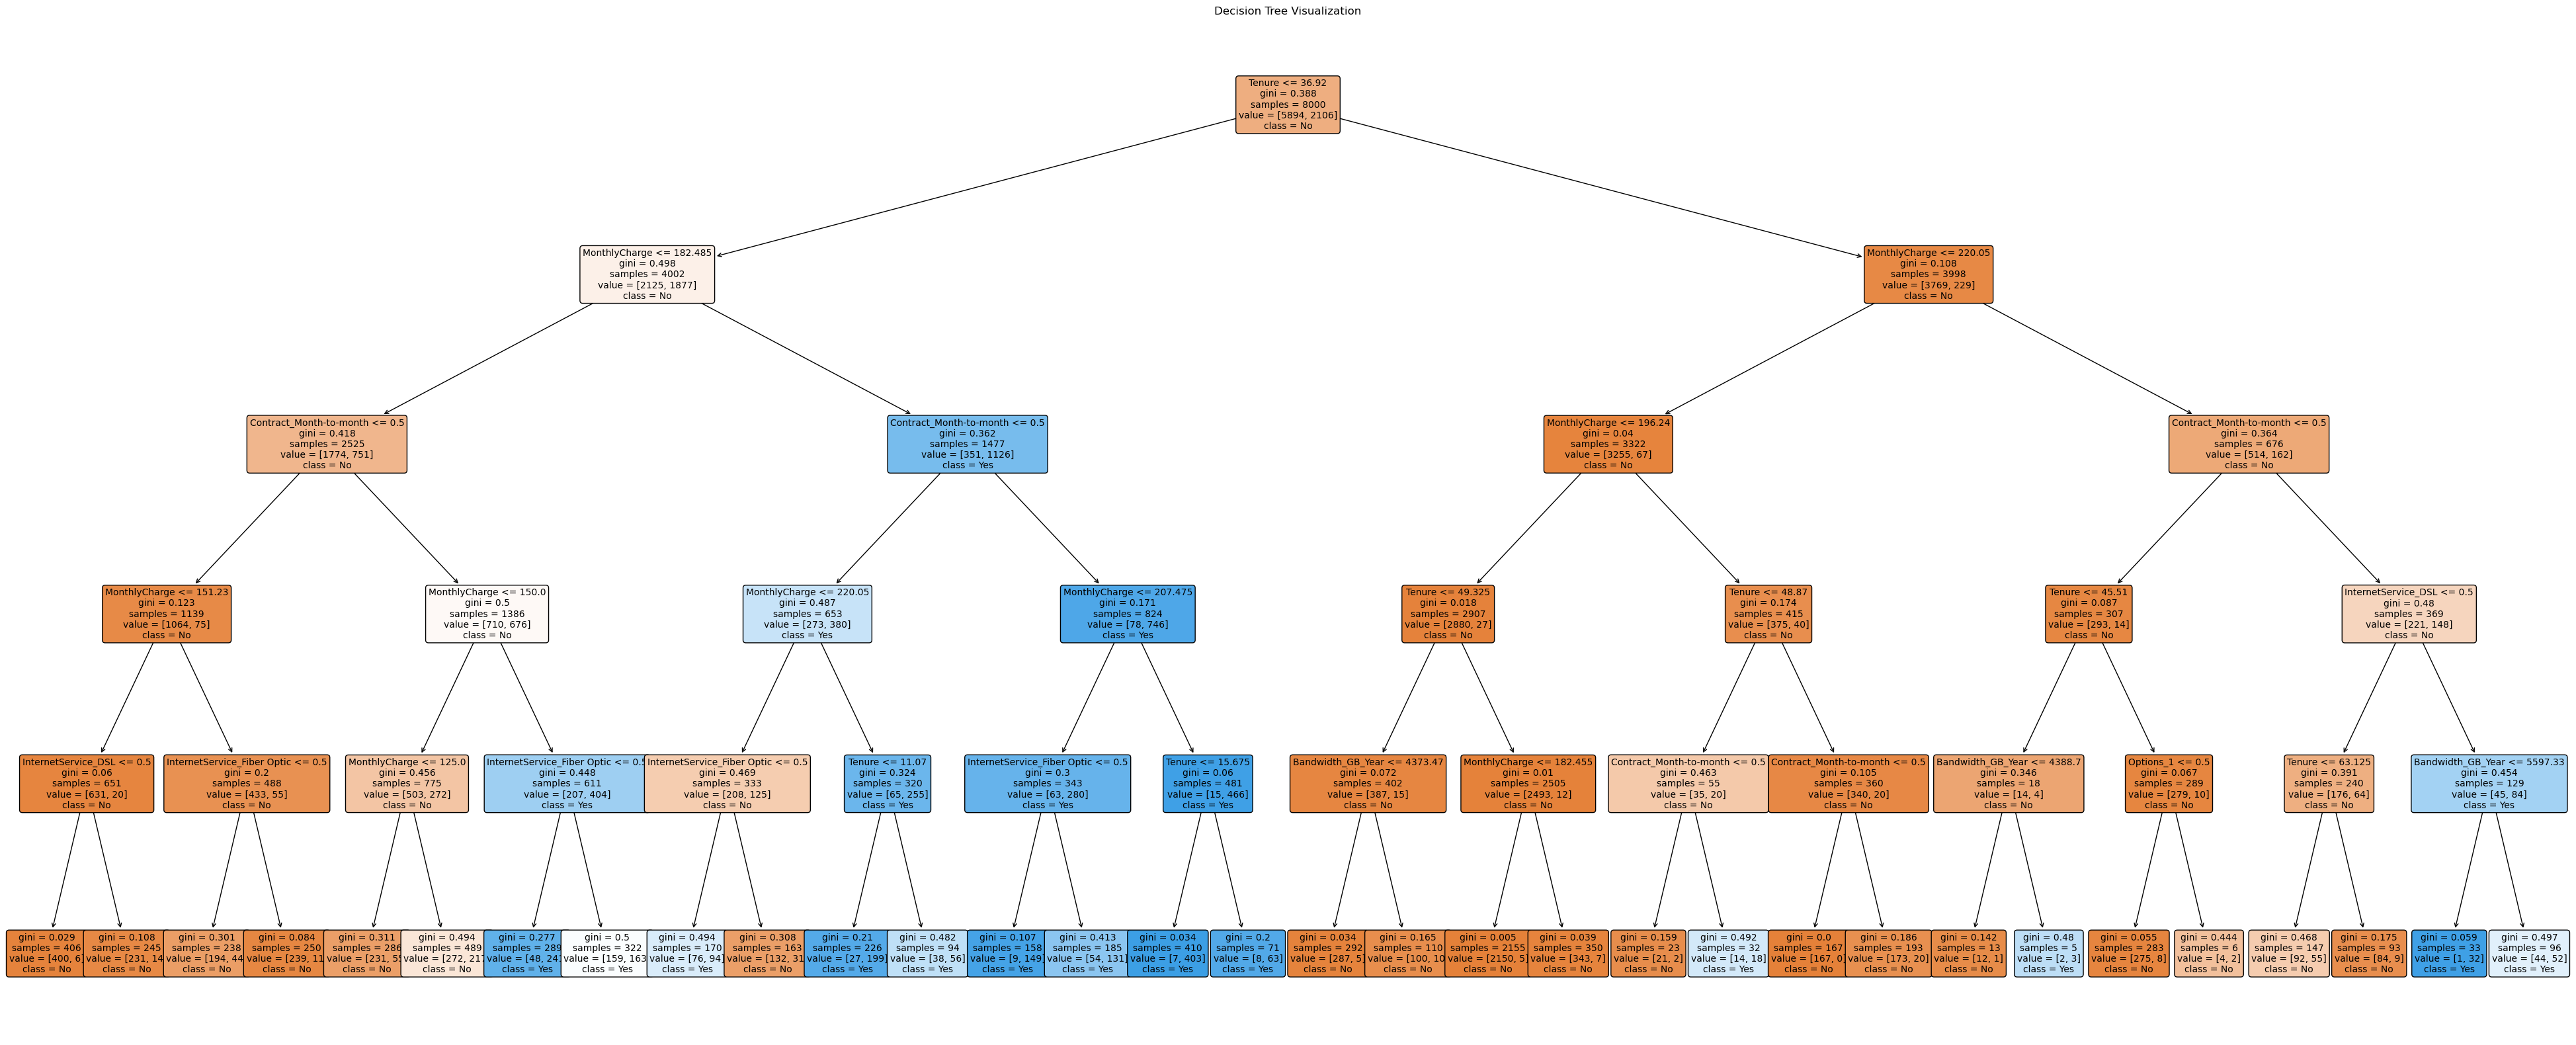

In [22]:
# Visualize the decision tree
plt.figure(figsize=(50, 20))  # Adjust the size as needed for readability
plot_tree(
    clf,
    feature_names=all_feature_names,  
    class_names=label_encoder.classes_,  
    filled=True,  
    rounded=True,  
    fontsize=10   
)
plt.title("Decision Tree Visualization")
plt.show()

In [23]:
# Convert X_train, X_test, y_train, and y_test to DataFrames 
X_train_df = pd.DataFrame(X_train, columns=all_feature_names)  
X_test_df = pd.DataFrame(X_test, columns=all_feature_names)
y_train_df = pd.Series(y_train, name="Churn")  
y_test_df = pd.Series(y_test, name="Churn")

# Save to CSV
X_train_df.to_csv('X_train.csv', index=False)
X_test_df.to_csv('X_test.csv', index=False)
y_train_df.to_csv('y_train.csv', index=False)
y_test_df.to_csv('y_test.csv', index=False)

In [24]:
X_encoded_df

,MonthlyCharge,Bandwidth_GB_Year,Age,Tenure,Contract_Month-to-month,Contract_One year,Contract_Two Year,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,...,EvidenceOfActiveListening_6,EvidenceOfActiveListening_7,EvidenceOfActiveListening_8,OnlineSecurity_No,OnlineSecurity_Yes,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Churn
0,172.46,904.54,68.0,6.80,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,242.63,800.98,27.0,1.16,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
2,159.95,2054.71,50.0,15.75,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
3,119.96,2164.58,48.0,17.09,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,149.95,271.49,83.0,1.67,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,159.98,6511.25,23.0,68.20,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
9996,207.48,5695.95,48.0,61.04,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
9997,169.97,4159.31,48.0,47.42,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
9998,252.62,6468.46,39.0,71.10,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
